# Lab 0: introduction into image filtering using PyTorch
This is a notebook, which could help you with testing first lab assignment.
It contains utility functions for visualization, some test input for the functions you needs to implement,
and the output of the reference solution for the same test input.

template functions for the assignment contain a short description of what the function is supposed to do,
and produce an incorrect output, which is nevertheless in proper format: type and shape.

You are not allowed to use kornia or opencv or any other library functions, which are specifically designed
to perform the operations requested in assignment

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import torch
import kornia


def plot_torch(x, y, *kwargs):
    plt.plot(x.detach().cpu().numpy(), y.detach().cpu().numpy(), *kwargs)
    return

def imshow_torch(tensor, *kwargs):
    plt.figure()
    plt.imshow(kornia.tensor_to_image(tensor), *kwargs)
    return
inp = torch.linspace(-12, 12, 101)

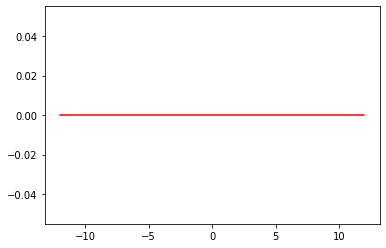

In [2]:
from imagefiltering import gaussian1d
plot_torch(inp, gaussian1d(inp, 3.0), 'r-')


## Reference example
```python
from lab0_reference.imagefiltering import gaussian1d
plot_torch(inp, gaussian1d(inp, 3.0), 'g-')

```

![image.png](imagefiltering_files/att_00000.png)

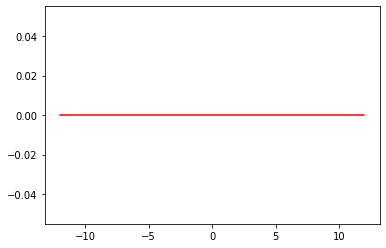

In [3]:
from imagefiltering import gaussian_deriv1d
plot_torch(inp, gaussian_deriv1d(inp, 3.0), 'r-')

## Reference example

```python
from lab0_reference.imagefiltering import gaussian_deriv1d
plot_torch(inp, gaussian_deriv1d(inp, 3.0), 'r-')
```

![image.png](imagefiltering_files/att_00001.png)

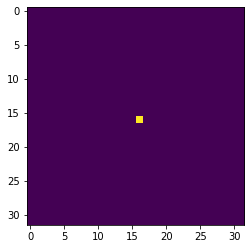

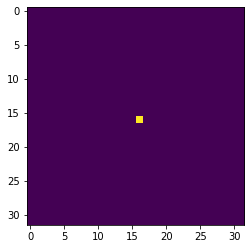

In [4]:
from imagefiltering import filter2d #, dgauss, gaussfilter, gaussderiv, gaussderiv2
inp = torch.zeros((1,1,32,32))
inp[...,16,16] = 1.
imshow_torch(inp)

kernel = torch.ones(3,3)

out = filter2d(inp, kernel)
imshow_torch(out)


## Reference example
```python
from imagefiltering import filter2d
inp = torch.zeros((1,1,32,32))
inp[...,16,16] = 1.
imshow_torch(inp)

kernel = torch.ones(3,3)

out = filter2d(inp, kernel)
imshow_torch(out)
```
![image.png](imagefiltering_files/att_00002.png)

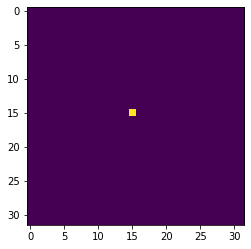

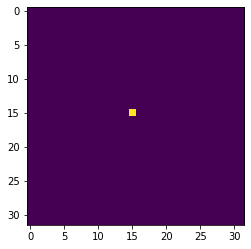

In [5]:
from imagefiltering import gaussian_filter2d
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out = gaussian_filter2d(inp, sigma)
imshow_torch(out)


## Reference example

```python
from lab0_reference.imagefiltering import gaussian_filter2d
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out = gaussian_filter2d(inp, sigma)
imshow_torch(out)
```
![image.png](imagefiltering_files/att_00003.png)

torch.Size([1, 1, 2, 32, 32])


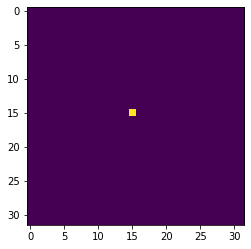

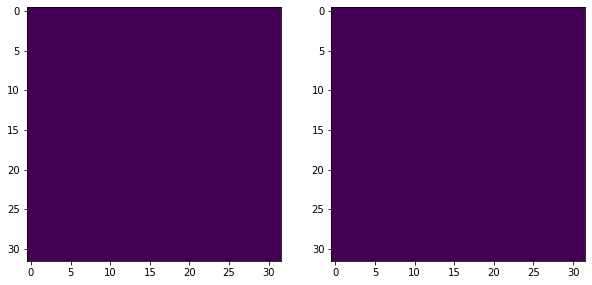

In [6]:
def imshow_torch_channels(tensor, dim = 1, *kwargs):
    num_ch = tensor.size(dim)
    fig=plt.figure(figsize=(num_ch*5,5))
    tensor_splitted = torch.split(tensor, 1, dim=dim)
    for i in range(num_ch):
        fig.add_subplot(1, num_ch, i+1)
        plt.imshow(kornia.tensor_to_image(tensor_splitted[i].squeeze(dim)), *kwargs)
    return

from imagefiltering import spatial_gradient_first_order
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out = spatial_gradient_first_order(inp, sigma)
print (out.shape)
imshow_torch_channels(out, 2)


## Reference example


```python 
from lab0_reference.imagefiltering import spatial_gradient_first_order
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out = spatial_gradient_first_order(inp, sigma)
print (out.shape)
imshow_torch_channels(out, 2)
```
![image.png](imagefiltering_files/att_00004.png)

torch.Size([1, 1, 3, 32, 32])


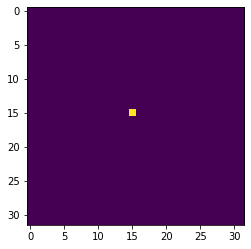

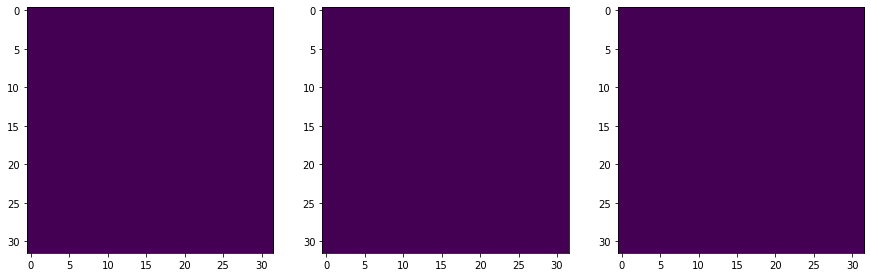

In [7]:
from imagefiltering import spatial_gradient_second_order
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out = spatial_gradient_second_order(inp, sigma)
print (out.shape)
imshow_torch_channels(out, 2)

## Reference example

```python
from lab0_reference.imagefiltering import spatial_gradient_second_order
inp = torch.zeros((1,1,32,32))
inp[...,15,15] = 1.
imshow_torch(inp)

sigma = 3.0
out = spatial_gradient_second_order(inp, sigma)
print (out.shape)
imshow_torch_channels(out, 2)
```
![image.png](imagefiltering_files/att_00005.png)

## Converting (center, unit_x, unit_y) into affine transform A
![image.png](imagefiltering_files/att_00006.png)

In [8]:
from imagefiltering import affine
inp = torch.tensor([[3, 3.]]), torch.tensor([[6, 3.]]), torch.tensor([[3, 6.]])
A = affine(*inp)
print (A)

tensor([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]])


## Reference example

```python 
from lab0_reference.imagefiltering import affine
inp = 3, 3, 6, 3, 3, 6
A = affine(*inp)
print (A)
```

    tensor([[3., 0., 3.],
            [0., 3., 3.],
            [0., 0., 1.]])

## Affine patch extraction
![image.png](imagefiltering_files/att_00007.png)

A = tensor([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]],

        [[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]])
patches.shape = torch.Size([4, 3, 32, 32])


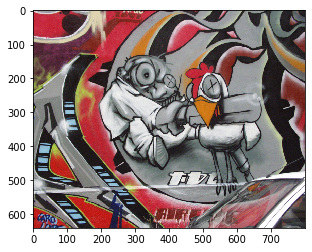

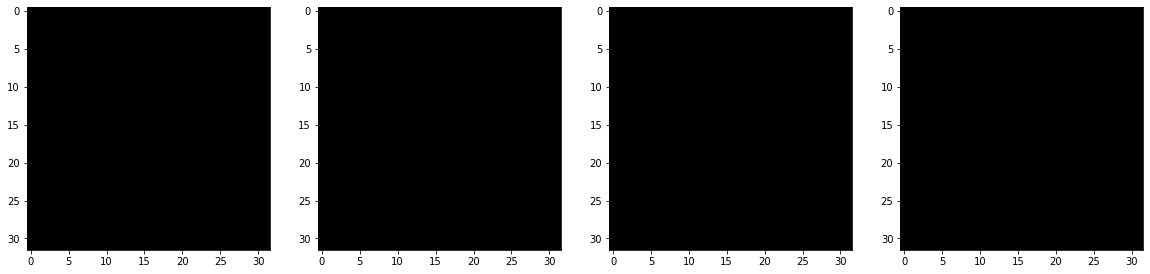

In [9]:
from imagefiltering import extract_affine_patches, affine
import cv2
img1 = cv2.imread('graffiti.ppm')

timg1 = kornia.image_to_tensor(img1, False).float()
timg1 = kornia.color.bgr_to_rgb(timg1)
imshow_torch(timg1/255.)

patch_centers = torch.tensor([[300., 200.], [400., 300], [600,600], [100,100]])
patch_unitx = torch.tensor([[350., 210.], [450., 300], [650,600], [150,150]])
patch_unity = torch.tensor([[270., 150.], [400., 360], [600,650], [50, 150]])

A = affine(patch_centers, patch_unitx, patch_unity)
print (f'A = {A}')
patches = extract_affine_patches(timg1,
                                 A, 
                                 torch.zeros(A.size(0)).long(),
                                 32, 1.0)

print (f'patches.shape = {patches.shape}')
imshow_torch_channels(patches/255., 0)

## Reference example

```python
from lab0_reference.imagefiltering import extract_affine_patches, affine
import cv2
img1 = cv2.imread('graffiti.ppm')

timg1 = kornia.image_to_tensor(img1, False)
timg1 = kornia.color.bgr_to_rgb(timg1)
imshow_torch(timg1/255.)

patch_centers = torch.tensor([[300., 200.], [400., 300], [600,600], [100,100]])
patch_unitx = torch.tensor([[350., 210.], [450., 300], [650,600], [150,150]])
patch_unity = torch.tensor([[270., 150.], [400., 360], [600,650], [50, 150]])

A = affine(patch_centers, patch_unitx, patch_unity)
print (f'A = {A}')

patches = extract_affine_patches(timg1, A.unsqueeze(0), torch.zeros(A.size(0)).long(), 32, 1.0)
print (f'patches.shape = {patches.shape}')
imshow_torch_channels(patches/255., 0)
```

    A = tensor([[[ 50., -30., 300.],
             [ 10., -50., 200.],
             [  0.,   0.,   1.]],

            [[ 50.,   0., 400.],
             [  0.,  60., 300.],
             [  0.,   0.,   1.]],

            [[ 50.,   0., 600.],
             [  0.,  50., 600.],
             [  0.,   0.,   1.]],

            [[ 50., -50., 100.],
             [ 50.,  50., 100.],
             [  0.,   0.,   1.]]])
    patches.shape = torch.Size([4, 3, 32, 32])
![image.png](imagefiltering_files/att_00008.png)